# Video Game Data Analysis Project 🎮
## • Project Overview
This project focuses on collecting, analyzing, and visualizing data about video games.


## • Tools Used
- Python
- Pandas
- Matplotlib
- requests

## • Objectives
- API
- Perform data cleaning
- Analyze content distribution
- Visualize trends over time
- Extract meaningful insights

---

## collecting the data using an API

In [1]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import ast


In [2]:
api_key = "ea10a8f0200b4e6190880551c384eb9b"
base_url = "https://api.rawg.io/api/games"

In [3]:
games_list = []
page = 1
per_page = 40

In [4]:
while len(games_list) < 2000:
    params = {
        "key": api_key,
        "page": page,
        "page_size": per_page
    }
    response = requests.get(base_url, params=params)
    data = response.json()

    if "results" not in data or len(data["results"]) == 0:
        break

    for game in data["results"]:
        games_list.append({
            "name": game.get("name"),
            "released": game.get("released"),
            "rating": game.get("rating"),
            "platforms": [p["platform"]["name"] for p in game.get("platforms", [])],
            "genres": [g["name"] for g in game.get("genres", [])],
        })

    page += 1
    time.sleep(0.2)

In [5]:
df = pd.DataFrame(games_list)
print("Number of games fetched:", len(df))

Number of games fetched: 2000


In [6]:
df.head()

,name,released,rating,platforms,genres
0,Grand Theft Auto V,2013-09-17,4.47,"[PlayStation 5, Xbox Series S/X, PlayStation 3...",[Action]
1,The Witcher 3: Wild Hunt,2015-05-18,4.64,"[PlayStation 5, Xbox Series S/X, macOS, PlaySt...","[Action, RPG]"
2,Portal 2,2011-04-18,4.58,"[PlayStation 3, PC, Xbox 360, Linux, macOS, Xb...","[Shooter, Puzzle]"
3,Counter-Strike: Global Offensive,2012-08-21,3.57,"[PC, Linux, Xbox 360, PlayStation 3]",[Shooter]
4,Tomb Raider (2013),2013-03-05,4.06,"[PlayStation 3, Xbox 360, macOS, PC]",[Action]


### Information About Data.

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       2000 non-null   str    
 1   released   1996 non-null   str    
 2   rating     2000 non-null   float64
 3   platforms  2000 non-null   object 
 4   genres     2000 non-null   object 
dtypes: float64(1), object(2), str(2)
memory usage: 78.3+ KB


## Data cleaning

#### Check and delete null values.

In [8]:
df.dropna(inplace=True)
print("Count of null values in each column :")
df.isna().sum()

Count of null values in each column :


name         0
released     0
rating       0
platforms    0
genres       0
dtype: int64

#### Modification of some columns that are of type list.


In [9]:
categorical_columns = ["platforms", "genres"]

for col in categorical_columns:

    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    df[col] = df[col].apply(lambda x: tuple(sorted(x)) if isinstance(x, list) else x)
    
    print(f"Column {col} value counts:")
    print(df[col].value_counts())
    print("------------------------------")

Column platforms value counts:
platforms
(PC,)                                                                           214
(Linux, PC, macOS)                                                              149
(PC, PlayStation 4, Xbox One)                                                   129
(Nintendo Switch, PC, PlayStation 4, Xbox One)                                  101
(PC, PlayStation 3, Xbox 360)                                                    70
                                                                               ... 
(Game Boy, Nintendo 64, Nintendo Switch, PC, PlayStation 4, Xbox One, macOS)      1
(Android, PlayStation 3, PlayStation 4, iOS)                                      1
(Classic Macintosh, PC, macOS)                                                    1
(Linux, Nintendo Switch, PC, PlayStation 4, Wii U, Xbox One, iOS, macOS)          1
(Android, Linux, PC, Web, iOS, macOS)                                             1
Name: count, Length: 468, dtype: in

#### Check for duplicates.

In [10]:
print("Count of null values in each column :",df.duplicated().sum())

Count of null values in each column : 0


#### Change the data type.

In [11]:
df['released'] = pd.to_datetime(df['released'])

#### Some information after cleaning.

In [12]:
numeric_cols = df.select_dtypes(include=['float64'])
numeric_cols.describe()

,rating
count,1996.000000
mean,3.569569
std,0.616153
min,1.510000
25%,3.190000
50%,3.680000
75%,4.040000
max,4.800000


In [13]:
df.info()

<class 'pandas.DataFrame'>
Index: 1996 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       1996 non-null   str           
 1   released   1996 non-null   datetime64[us]
 2   rating     1996 non-null   float64       
 3   platforms  1996 non-null   object        
 4   genres     1996 non-null   object        
dtypes: datetime64[us](1), float64(1), object(2), str(1)
memory usage: 93.6+ KB


## Data Analysis

#### Best game based on ratings.

In [14]:
b_g = (df['name'][df['rating']==df['rating'].max()].iloc[0])
print("Best game based on ratings is :",b_g)

Best game based on ratings is : The Witcher 3 Wild Hunt - Complete Edition


#### The year with the most game releases.

In [15]:
years = df['released'].dt.year
b_y = years.value_counts().idxmax()
print("The year with the most game releases was :",b_y)

The year with the most game releases was : 2016


#### The Month with the Most Game Releases.

In [16]:
months = df['released'].dt.month
b_m = months.value_counts().idxmax()
print(f"Most games are released in : {b_m}m")

Most games are released in : 10m


#### The Most Common Game Genre.

In [17]:
m_g = df['genres'].value_counts().idxmax()
print(f"Most released {' and '.join(m_g)} games")

Most released Action and Shooter games


#### The Platform with the Most Games.

In [18]:
m_p = df['platforms'].value_counts().idxmax()
print(f"Most of the released games were available on {' and '.join(m_p)}")


Most of the released games were available on PC


## Data Visualization

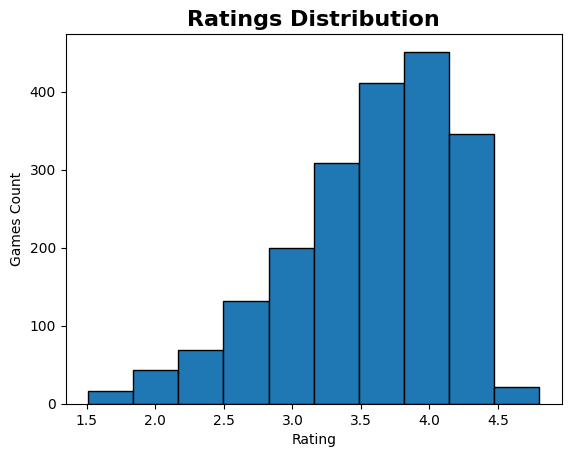

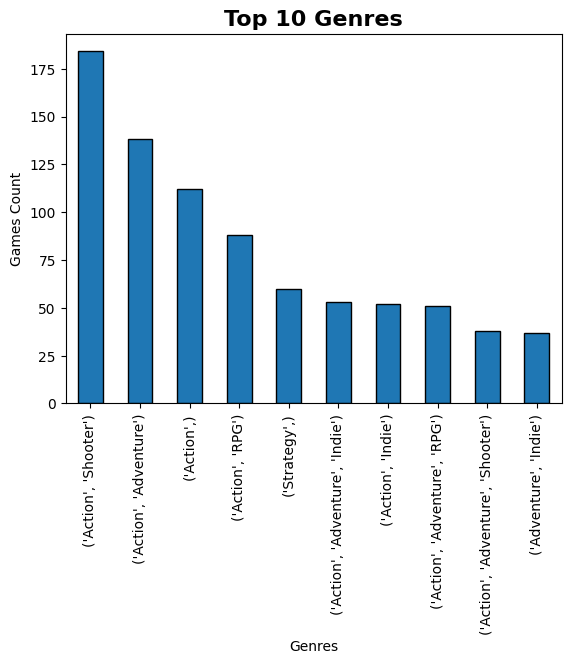

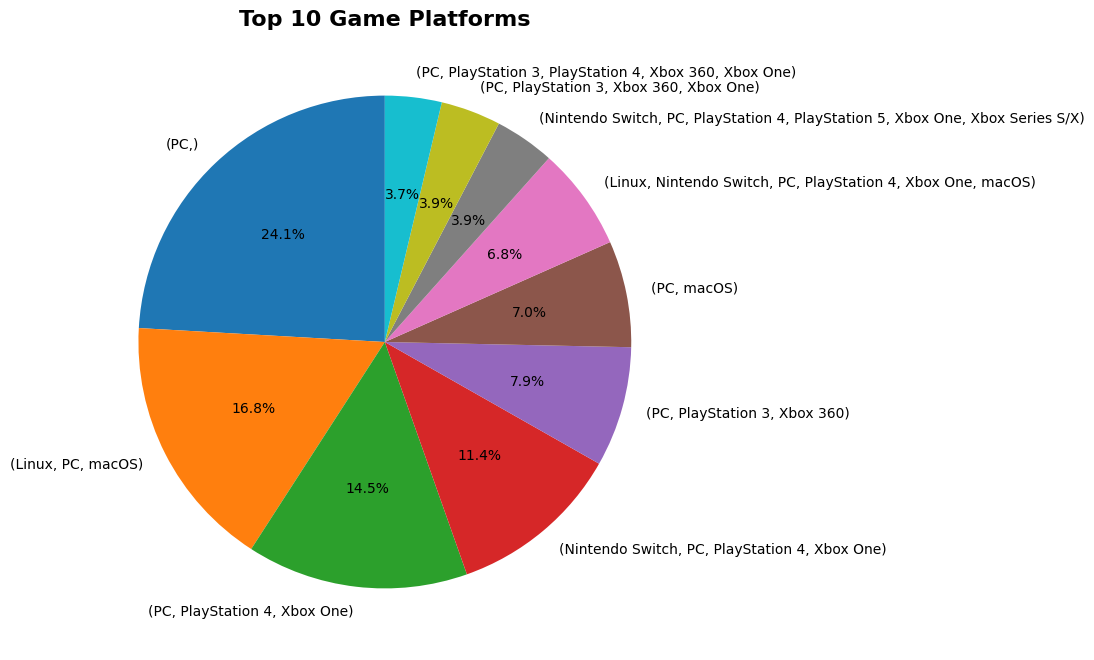

In [19]:
df['rating'].plot(kind='hist',edgecolor='black')
plt.title("Ratings Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Games Count")
plt.show()

df['genres'] = df['genres'].astype(str)
df['genres'].value_counts().head(10).plot(kind='bar',edgecolor='black')
plt.title("Top 10 Genres", fontsize=16, fontweight='bold')
plt.xlabel("Genres")
plt.ylabel("Games Count")
plt.show()


top_platforms = df['platforms'].value_counts().head(10)
top_platforms.plot(kind='pie', autopct='%1.1f%%', startangle=90,figsize=(8,8))
plt.title("Top 10 Game Platforms", fontsize=16, fontweight='bold')
plt.show()


## Executive Summary
The analysis shows that:
- Top-Rated Game: The Witcher 3: Wild Hunt - Complete Edition leads in player ratings, indicating high player engagement and quality standards.
- Peak Release Year: 2016 saw the highest number of game releases, suggesting potential trends in development cycles and market saturation.
- Busiest Release Month: October had the most game launches, highlighting seasonal opportunities for future releases and marketing campaigns.
- Most Popular Genres: Action and Shooter games dominate the market, signaling strong player demand and opportunities for investment in these genres.
- Leading Platform: PC hosts the majority of released games, suggesting it remains a critical platform for developers and publishers targeting broad audiences.